In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning

### Remove invalid first column `RespondentID` which are NaN.

In [5]:
star_wars = star_wars.dropna(subset=['RespondentID'])

### Change the second and third columns.

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().value_counts()

False    836
True     350
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

The values for the second and third columns which are `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` respectively are `Yes`, `No`, `NaN`. We want to change them to `True` or `False`.

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

### Cleaning the columns from index 3 to 9.

From the fourth column to ninth columns are checkbox questions:  
* If values are the movie names: they have seen the movies.  
* If values are NaN: they have not seen the movies.  

We are going to convert the values of these columns to bool type.

In [10]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].apply(lambda x: False if pd.isnull(x) else True)

Rename the columns from index 3 to 9 for better readibility.  
`seen_1` means Star Wars Episode I, and so on.

In [11]:
star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', \
                          'Unnamed: 4': 'seen_2', \
                          'Unnamed: 5': 'seen_3', \
                          'Unnamed: 6': 'seen_4', \
                          'Unnamed: 7': 'seen_5', \
                          'Unnamed: 8': 'seen_6'}, inplace=True)

### Cleaning the columns from index 9 to 15.

Changing data type to float.

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Renaming columns names.

In [13]:
star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1', \
                          'Unnamed: 10': 'ranking_2', \
                          'Unnamed: 11': 'ranking_3', \
                          'Unnamed: 12': 'ranking_4', \
                          'Unnamed: 13': 'ranking_5', \
                          'Unnamed: 14': 'ranking_6'}, inplace=True)

### Cleaning the cloumns from index 15 to 29.

In [14]:
star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Luck Skywalker', \
                          'Unnamed: 16': 'Han Solo', \
                          'Unnamed: 17': 'Princess Leia Oragana', \
                          'Unnamed: 18': 'Obi Wan Kenobi', \
                          'Unnamed: 19': 'Yoda', \
                          'Unnamed: 20': 'R2-D2', \
                          'Unnamed: 21': 'C-3P0', \
                          'Unnamed: 22': 'Anakin Skywalker', \
                          'Unnamed: 23': 'Darth Vader', \
                          'Unnamed: 24': 'Lando Calrissian', \
                          'Unnamed: 25': 'Padme Amidala', \
                          'Unnamed: 26': 'Boba Fett', \
                          'Unnamed: 27': 'Emperor Palpatine', \
                          'Unnamed: 28': 'Jar Jar Binks'}, inplace=True)

## Data Analysis

### Finding The Most Seen Movie

In [15]:
seen_sum = star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()

In [16]:
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [17]:
seen_sum.idxmax()

'seen_5'

From the data above, we can find that the most seen movie is the episode V.

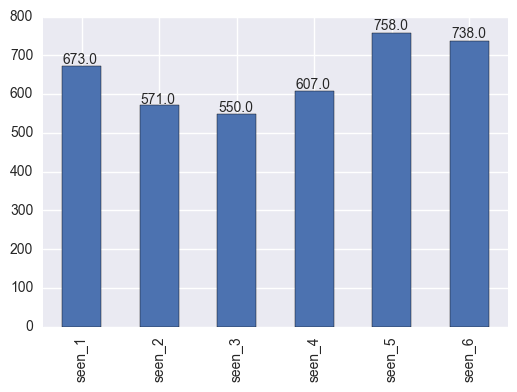

In [18]:
ax = seen_sum.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))
plt.show()

### Finding The Highest Ranked Movie.

In [19]:
ranking_mean = star_wars[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']].mean()

In [20]:
ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [21]:
ranking_mean.idxmin()

'ranking_5'

The highest ranked movie is `ranking_5` which is the episode V.

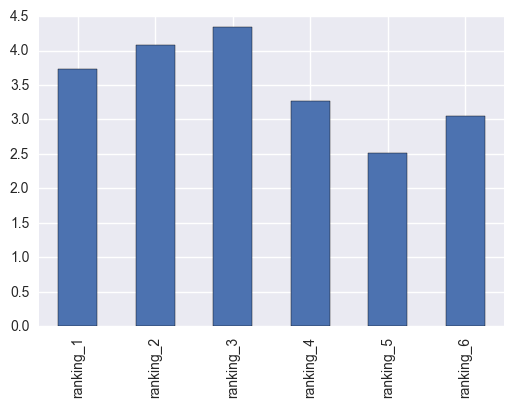

In [22]:
ranking_mean.plot(kind='bar')
plt.show()

## Let's break down data by `Gender`.

In [23]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

### The number of movies seen.

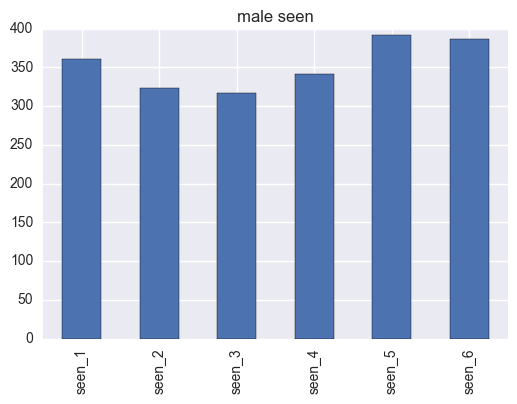

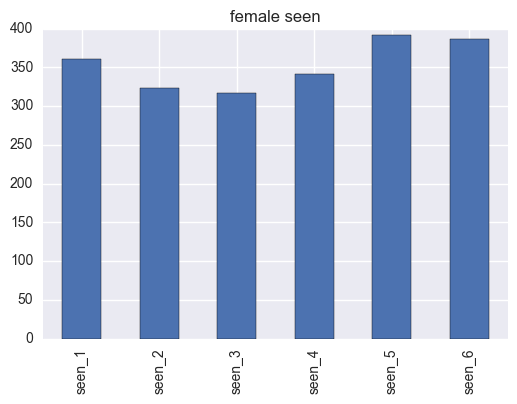

In [24]:
males[males.columns[3:9]].sum().plot(kind='bar', title='male seen')
plt.show()

males[females.columns[3:9]].sum().plot(kind='bar', title='female seen')
plt.show()

### The ranking of movies.

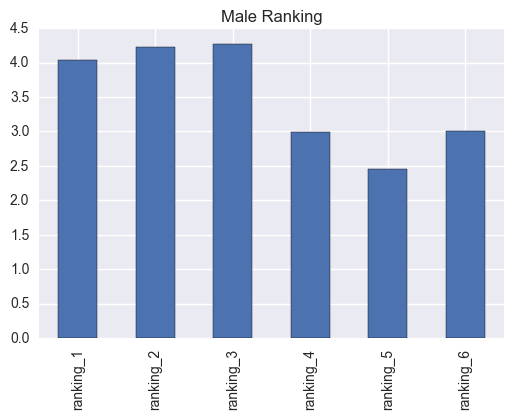

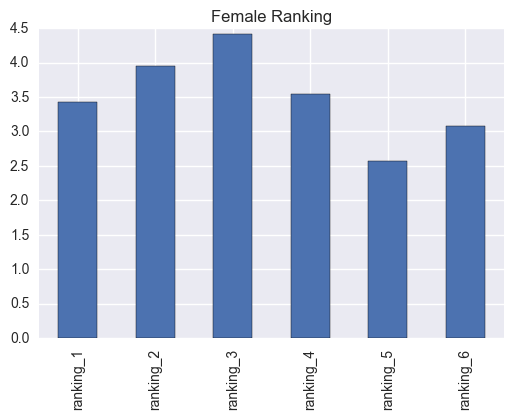

In [25]:
males[males.columns[9:15]].mean().plot(kind='bar', title='Male Ranking')
plt.show()

females[males.columns[9:15]].mean().plot(kind='bar', title='Female Ranking')
plt.show()

From the charts above, we do not find significant difference among gender.

## `Star Wars` Character Favorability Ratings

In [26]:
star_wars['Luck Skywalker'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Luck Skywalker, dtype: int64

In [27]:
star_wars[star_wars.columns[15:29]].head()

,Luck Skywalker,Han Solo,Princess Leia Oragana,Obi Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Darth Vader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [28]:
fav = star_wars[star_wars.columns[15:29]].dropna()

In [29]:
fav.head()

,Luck Skywalker,Han Solo,Princess Leia Oragana,Obi Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Darth Vader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably


Convert `fav` to pivot table.

In [30]:
fav_df_list = []
for col in fav.columns.tolist():
    row = fav[col].value_counts()
    d1 = pd.DataFrame(data={'favorably': row[0] + row[1], \
                   'neutral': row[2], \
                   'unfavorably': row[4] + row[5], \
                   'Unfamiliar': row[3]}, \
                  index=[col], \
                  columns=['favorably', 'neutral', 'unfavorably', 'Unfamiliar'])
    fav_df_list.append(d1)

In [31]:
fav_pivot = pd.concat(fav_df_list)

In [32]:
fav_pivot

,favorably,neutral,unfavorably,Unfamiliar
Luck Skywalker,699,40,7,14
Han Solo,705,36,8,11
Princess Leia Oragana,693,45,11,11
Obi Wan Kenobi,481,118,82,79
Yoda,697,40,11,12
R2-D2,339,135,167,119
C-3P0,448,135,83,94
Anakin Skywalker,434,131,65,130
Darth Vader,375,133,128,124
Lando Calrissian,645,74,19,22


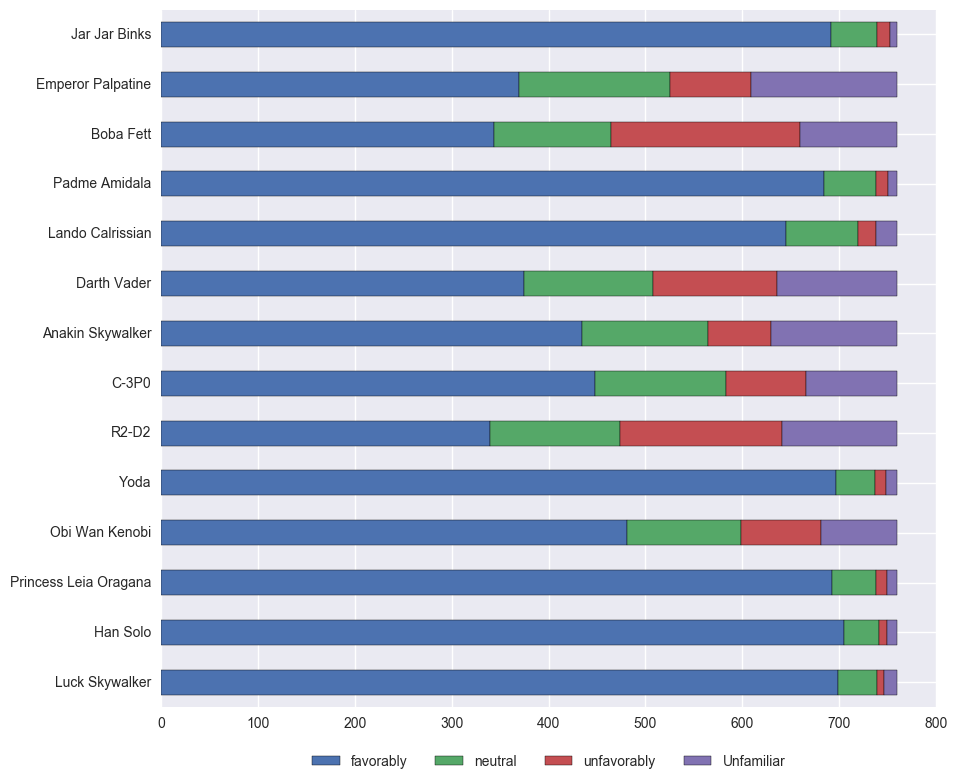

In [33]:
fig = plt.figure()
ax = plt.subplot(111)

fav_pivot.plot(kind='barh', stacked=True, figsize=(10,10), ax=ax)


# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

### Who Shot First?

In [34]:
shot_first = star_wars['Which character shot first?'].value_counts()

shot_first

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [35]:
shot_sum = shot_first.sum()

shot_first = shot_first.apply(lambda x: x / shot_sum * 100)

shot_first

Han                                 39.251208
I don't understand this question    36.956522
Greedo                              23.792271
Name: Which character shot first?, dtype: float64

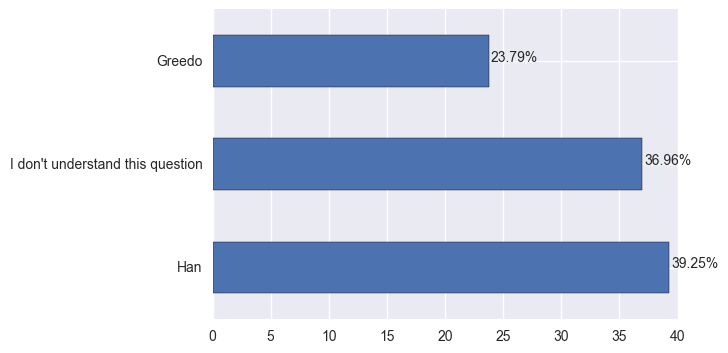

In [36]:
ax = shot_first.plot(kind='barh')
for p in ax.patches:
    ax.annotate(str("{0:.2f}%".format(round(p.get_width(),2))), (p.get_width() * 1.005, p.get_y() + p.get_height() * 0.5))
plt.show()